# Clustering Jerárquico

Importamos las librerías y cargamos el conjunto de datos (Mall_Customers.csv), indicando que la variable que se analizará es una matriz con las columnas 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carga del conjunto de datos
dataset = pd.read_csv('./datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

Para crear el dendograma utilizamos la clase ```sch``` del paquete scipy.hierarchy

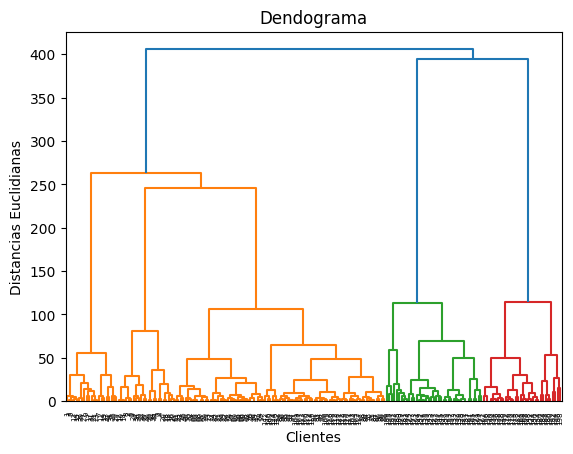

In [2]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

En el gráfico podemos observar que la distancia máxima la marca la línea azul oscuro que une los clusters rojo y azul claro, por lo que si realizamos el corte en esa zona obtenemos: 
(En el lado opuesto (el izquierdo), se observa que la distancia más larga (máxima) se corresponde con la primera línea del clúster naranja. Por tanto el corte debe cortar esa línea también!!)  

<img src='./img/corteJerarquico.jpg'>

Al marcar con la línea color naranja el dendograma donde se observa la distancia máxima, que genera 5 clusters que se han identificado con números.   

Con ello, se generan los grupos con el método aglomerante utilizando la clase AgglomerativeClustering del paquete sklearn.cluster:

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    metric = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters se plantea lo siguiente:

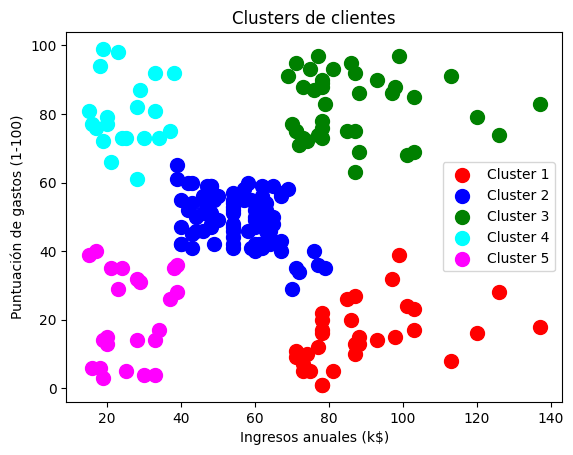

In [5]:
# Visualización de clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de clientes')
plt.xlabel('Ingresos anuales (k$)')
plt.ylabel('Puntuación de gastos (1-100)')
plt.legend()
plt.show()

De nuevo, en relación al ingreso anual en miles y la puntuación generada por la tienda, observamos un grupo de clientes que podría ser de interés para la tienda: el grupo de clientes en **color verde**, lo cuales tienen ingresos altos y una puntuación alta, por lo que podrían ser un grupo objetivo para ciertas promociones.    
En purpura tenemos a los clientes de baja puntuación y bajos ingresos, mientras que en azul claro, a los clientes con ingresos bajos pero con alta puntuación, lo cual podría indicar que estos clientes compran mucho a pesar de los ingresos bajos.    
Volvemos a comprobar como el análisis cluster permite hacer inferencias y tomar decisiones de negocios.